# Final Assignment

In this assignment, I chose red wine quality data from Kaggle.com which was created by UC Irvine Machine Learning Department. There are 12 different categories in this dataset which are **fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, and quality**. Other than quality, all of the categories are quantitative analysis of red wine that were analyzed in lab. Since they are quantitative analysis, all of the data are in float. 

The quality category is a rating that was made by experts to determine which wine has good and bad quality. The rating of 6.5 is the threshold to become a good quality wine. 

In this assignment, I am making a machine learning model from given dataset to determine if red wines are good or bad by their quantitative analysis. 

### Importing Necessary Libraries

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pydotplus
import sklearn.tree as tree
import joblib

from time import time

from IPython.display import Image

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

### Load Dataset

In [2]:
df = pd.read_csv("winequality-red.csv")

### Data Overview

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
df["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [25]:
df.shape

(1599, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


##### Checking if there are empty data

In [7]:
df.isnull().sum()/len(df)*100

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

#### Compare Each Categories with Quality

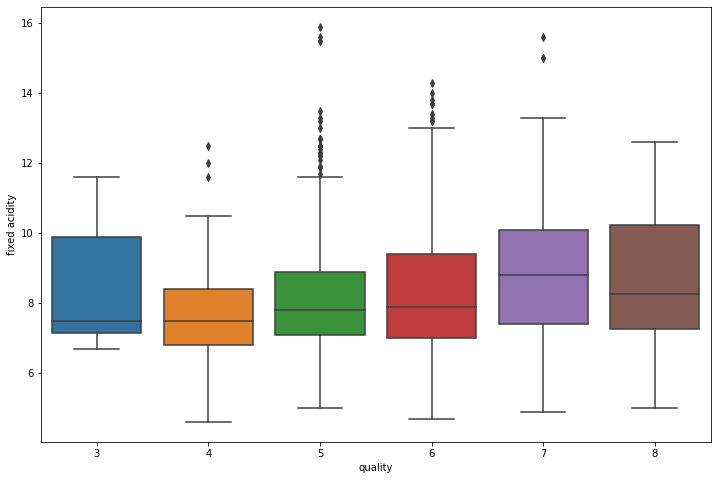

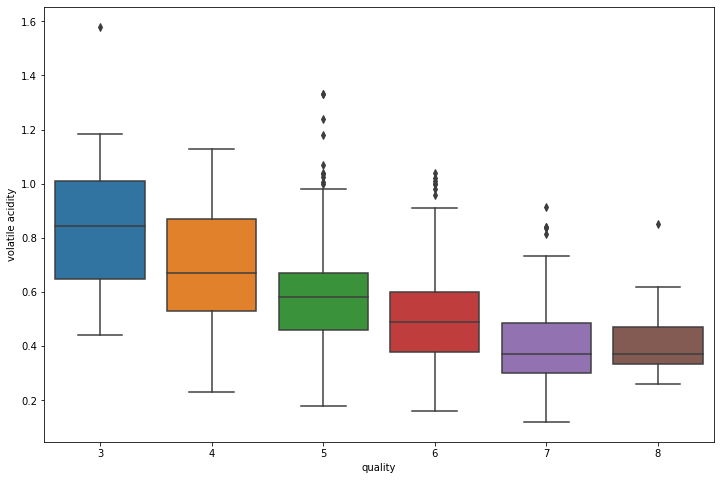

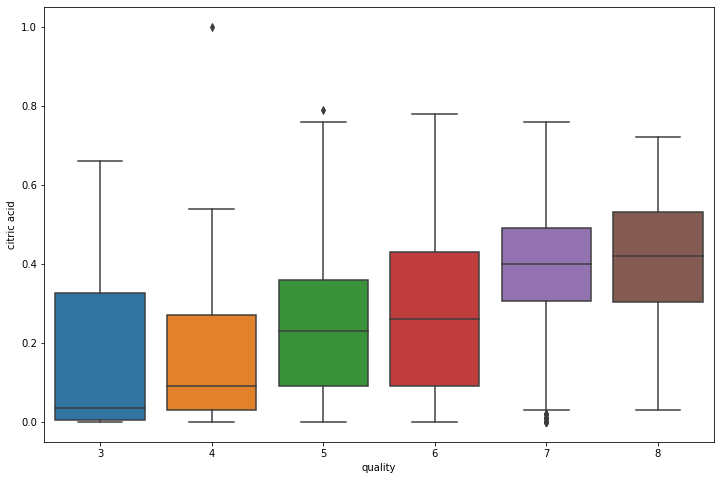

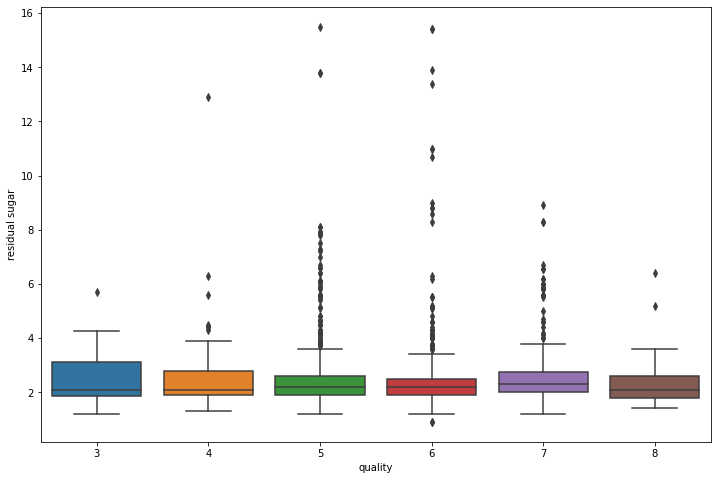

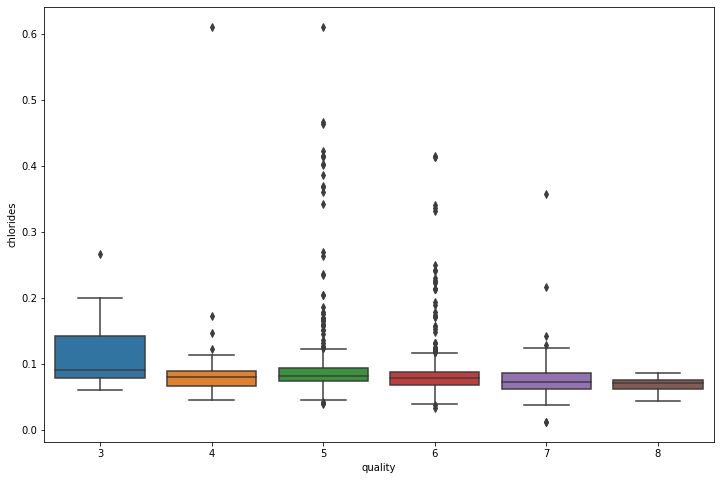

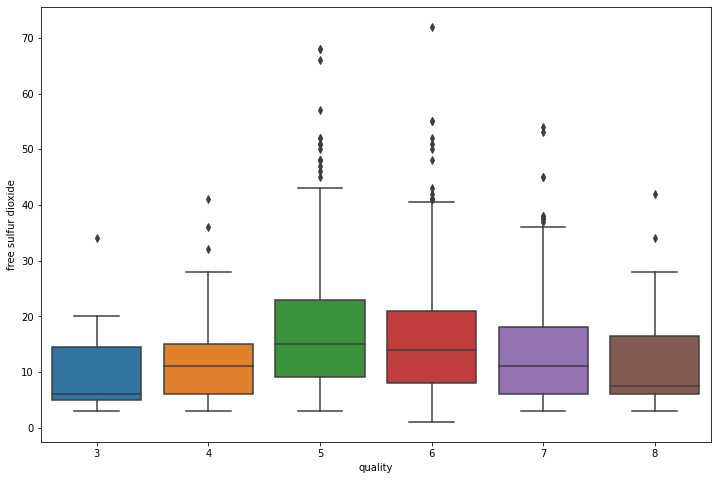

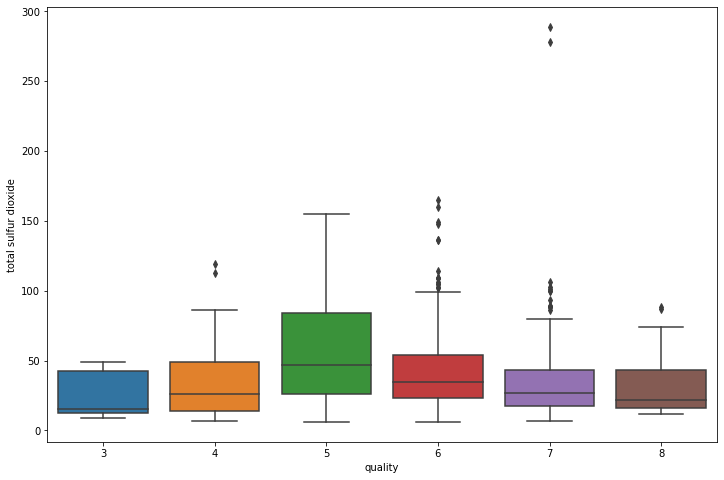

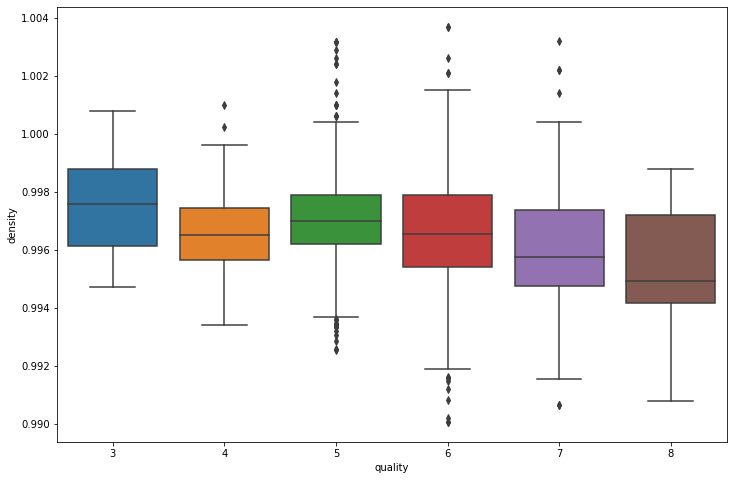

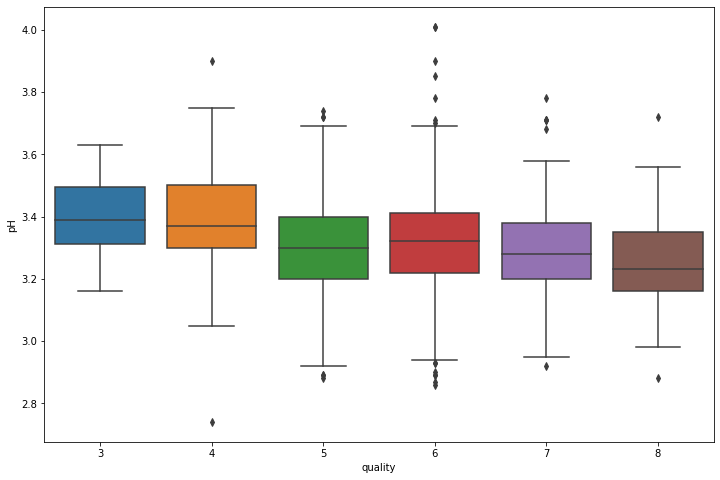

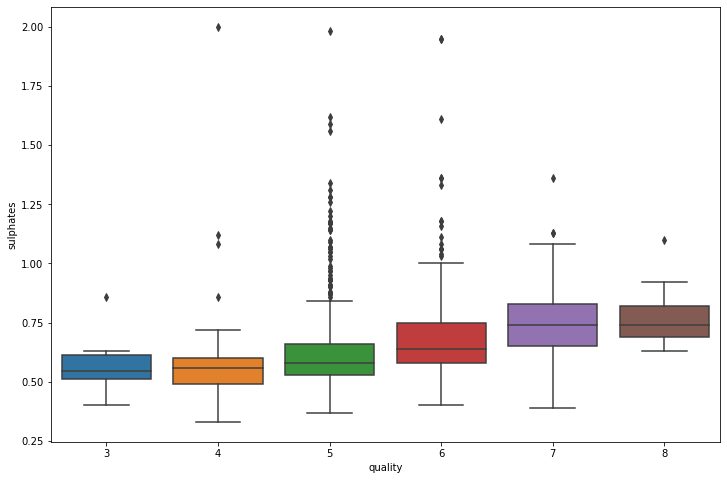

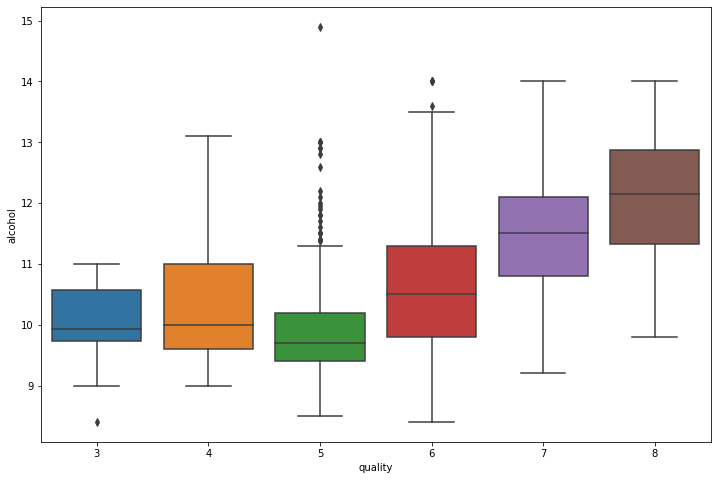

In [23]:
wine_var = df.drop("quality", axis = 1).columns

for var in wine_var:
    fig = plt.figure(figsize = (12, 8))
    sns.boxplot(x = 'quality', y = var, data = df)
    plt.show()



There are some categories that correlates well with quality, for example citric acid. The median of citric acid in each qualities are slightly higher than the lower qualities. But I am not going to put only the category that correlates with quality since when a winemaker analyze their wine, they have to check all of the quantitative analysis necessary to make a good wine. This data can be stored in their own library as well.

The purpose of this machine learning model is to determine if the wine is good or bad according to their quantitative analysis.

### Data preprocessing

We have to determine which wine is good and bad by sorting their quality grade and group them into "good" and "bad"

In [67]:
bins = (2, 6.5, 9)
quality = ["bad", "good"]
df['quality_class'] = pd.cut(df["quality"], bins=bins, labels=quality)
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_class
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,bad
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,bad
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,bad
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,bad


In [28]:
df["quality_class"].value_counts()

bad     1382
good     217
Name: quality_class, dtype: int64

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

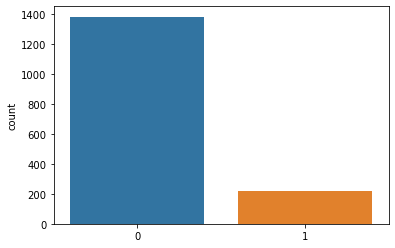

In [30]:
encoder = LabelEncoder()

enc_quality = encoder.fit_transform(df["quality_class"])

sns.countplot(enc_quality)

Ratio between good and bad wine. With this dataset, we can get a better reading for bad wines, but not so much of good wines because of the distribution of the data. 

Standard Scaler is used to standardize the data that has low values and low mean.

In [57]:
scaler = StandardScaler()
X = df.drop(["quality", "quality_class"], axis = 1)
X_scaled = scaler.fit_transform(X)
Y = enc_quality

x_train, x_test, y_train, y_test = train_test_split(
    X_scaled, Y, test_size=.3, 
    random_state=50
)

label_to_name = {idx: name for idx, name in enumerate(encoder.classes_)}
print("Targets:", label_to_name)

print("Training size:", x_train.shape[0])
print("Validation size:", x_test.shape[0])

Targets: {0: 'bad', 1: 'good'}
Training size: 1119
Validation size: 480


This is the function to train the model.

In [59]:
def train_model(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    train_acc = model.score(x_train, y_train)

    test_pred = model.predict(x_test)
    test_acc = model.score(x_test, y_test)

    print(f"\n--- Using {model.__class__.__name__} ---")
    start = time()
    model.fit(x_train, y_train)
    end = time()
    print(f"Done training model in {end - start:.3f}s..")
    start = time()
    prediction = model.predict(x_train)
    end = time()
    print(f"Done inferencing in {end - start:.3f}s..")
    print("-- training performance --")
    print("target:\n", y_train)
    print("prediction:\n", train_pred)
    print("accuracy score:\n", train_acc)
    print()
    print("-- test performance --")
    print("target:\n", y_test)
    print("prediction:\n", test_pred)
    print("accuracy score:\n", test_acc)
    
    print(classification_report(y_test, test_pred,target_names=encoder.classes_))

In [34]:
logistic = LogisticRegression()
svc = SVC()
bayes = GaussianNB()
forest = RandomForestClassifier()
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier()

Preview to confusion matrix.



In [68]:
print(confusion_matrix(y_test, model.predict(x_test)))

recall = 390/(390+29)
precision = 390/(390+33)
accuracy = (390+28)/(390+33+29+28)
f = (2*recall*precision)/(recall+precision)

print("Recall:", recall)
print("Precision:", precision)
print("Accuracy:", accuracy)
print("F-Measure:", f)

[[390  33]
 [ 29  28]]
Recall: 0.9307875894988067
Precision: 0.9219858156028369
Accuracy: 0.8708333333333333
F-Measure: 0.9263657957244655


### Model Training

In [60]:
for model in [logistic, svc, bayes, forest, knn, dtree]:
    train_model(model, x_train, x_test, y_train, y_test)
    print("===")


--- Using LogisticRegression ---
Done training model in 0.012s..
Done inferencing in 0.001s..
-- training performance --
target:
 [1 0 0 ... 0 0 0]
prediction:
 [1 0 0 ... 0 0 0]
accuracy score:
 0.8793565683646113

-- test performance --
target:
 [1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 

 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0]
prediction:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 

### Model Evaluation

Model                                          

Logistic Regression | Accuracy: 89% | Time:    T: 0.012s ; I: 0.001s

Support Vector Machine    | Accuracy:  90% |  Time:  T: 0.014s ; I: 0.008s

Naive Bayes      | Accuracy:     86%  | Time:    T: 0.001s ; I: 0.000s

Random Forrest         | Accuracy: 92%      | Time:   T: 0.186s ; I: 0.017s

K-Nearest Neighbors    | Accuracy: 89%      | Time:   T: 0.002s ; I: 0.045s

Decision Tree          | Accuracy: 87%      |  Time:  T: 0.004s ; I: 0.000s

Looking at overall accuracy score, Random Forrest has the highest score although its training and inferencing time are long. Its f1-score is also the best, but we have to take the time as an important variable.

SVC has the second best accuracy score and reasonable time spent to train and inference, but it's f1-score is average compare to the others. 

There is only one that I would use out of all of the models which is Naive Bayes. **Other than Naive Bayes takes the shortest time to train and inference, it has the best f1 scores at both bad and good quality with 92% and 53% respectively.** Sure its accuracy is the lowest, but when we use this model in a big load of input, Naive Bayes will be the fastest to get the job done. With 6% difference from the highest accuracy score is not significant.

### Model Saving

In [56]:
model = Pipeline([
    ("scaler", StandardScaler()),
    ("naive_bayes", GaussianNB())
])
start = time()
model.fit(x_train, y_train)
end = time()
print(f"Done training model in {end - start:.3f}s..")
start = time()
prediction = model.predict(x_train)
end = time()
print(f"Done inferencing in {end - start:.3f}s..")
print("performance on training set:")
print(classification_report(y_train, prediction, target_names=encoder.classes_))
print("performance on test set:")
print(classification_report(y_test, model.predict(x_test), target_names=encoder.classes_))

Done training model in 0.010s..
Done inferencing in 0.002s..
performance on training set:
              precision    recall  f1-score   support

         bad       0.94      0.84      0.89       959
        good       0.42      0.66      0.51       160

    accuracy                           0.82      1119
   macro avg       0.68      0.75      0.70      1119
weighted avg       0.86      0.82      0.83      1119

performance on test set:
              precision    recall  f1-score   support

         bad       0.95      0.89      0.92       423
        good       0.44      0.67      0.53        57

    accuracy                           0.86       480
   macro avg       0.70      0.78      0.72       480
weighted avg       0.89      0.86      0.87       480



In [63]:
filename = "gausiannb.joblib"
joblib.dump(model, filename)

['gausiannb.joblib']

In [64]:
load_model = joblib.load(filename)
print("performance on test set:")
print(classification_report(y_test, model.predict(x_test), target_names=encoder.classes_))

performance on test set:
              precision    recall  f1-score   support

         bad       0.93      0.92      0.93       423
        good       0.46      0.49      0.47        57

    accuracy                           0.87       480
   macro avg       0.69      0.71      0.70       480
weighted avg       0.87      0.87      0.87       480



Now the model has been created and ready to be deployed.

### Conclusion

Although this model works to determine if the wine is good or bad by their quantitative analysis, it works better to determine if the wine is bad. With the dataset we used, there are more bad wines to train which means a better accuracy score for bad wines, but less accuracy for good wines.

If used, this machine learning model will sometimes give a bad wine for a good wine. With 87% of accuracy, there 13% chance this machine will give a wrong answer, in spite of being fast to train and inferencing the sample.

This lack of accuracy can be improved by updating the library dataset each time of it being used and compare the quality given from the machine and the experts. This is a ongoing studies and can be improved with time. 